<a href="https://colab.research.google.com/github/JakeSparrow1/project_team_20/blob/main/shared_group_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. BUSINESS UNDERSTANDING

# problem statement
The University of Zambia wants to quickly identify research authored by its staff in the institutional repository. Manually verifying affiliations is slow and error-prone. We aim to build a predictive model that classifies whether an ETD document was authored by UNZA staff, based on metadata and content.

### Business Objectives

**What does "success" look like from a practical perspective?**

**Primary Success Indicators:**
- **Automated Classification**: System can process references faster than manual review
- **Research Visibility**: UNZA can quickly identify and showcase internal research citations  
- **Administrative Efficiency**: Reduce reference review time from days to hours
- **Decision Support**: Enable evidence-based faculty evaluation and research planning

**Practical Success Metrics:**
- **Time Savings**: 80% reduction in manual reference verification time
- **Processing Capability**: Handle 100-200 ETDs for comprehensive analysis
- **Accuracy**: >80% classification accuracy for administrative decision-making
- **User Adoption**: Research staff can operate system with minimal training
# Data Mining Goals
Primary goal: Build a supervised classification model
- We will build and evaluate a binaer classifier that inputs parsed reference metadata and outputs 1 if UNZA-STAFF author or 0 if NON UNZA_STAFF

# **Intial Project Success Criteria**  
- **Accuracy** : The model should achieve at least 80% accuracy and F1-score ≥ 0.80 on a held-out test dataset when classifying ETDs as authored by UNZA staff or not.
  
- **Efficiency** : The model should reduce manual affiliation verification time by at least 80% compared to the current process.  
- **Processing Capability** : The model should be able to process at least 50 ETDs per hour on available university hardware or cloud resources.




# 2. Data Understanding

In this section, we load our dataset, explore its structure, and generate initial insights.  
Each of the 5 group members contributes a different part of the data understanding process.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/clean_dataset.csv"
df = pd.read_csv(file_path, sep="|")

df.head()

,Author,Year,Title,Publisher,Keywords,Abstract,Document_Type,Repository_Link
0,Munsaka Soddy Mweetwa; Ndhlovu Jacob,2018,Vitamin B12 and Folate deficiency in Megalobla...,The International Journal of Multi-Disciplinar...,Megaloblastic anaemia; pancytopenia; Vitamin B...,Background: Vitamin B12 and folate deficiency ...,Article,http://dspace.unza.zm/handle/123456789/5330
1,Prashar Lavina; Goma Fastone; Kalungia Chichon...,2016,Indigenous Knowledge Systems for the Treatment...,Zambian Medical Association,hypertension; traditional health practitioners...,Indigenous knowledge systems and traditional t...,Article,http://dspace.unza.zm/handle/123456789/5494
2,Prashar Lavina; Muyenga Tumelo; Bwalya Angela ...,2015,The Effect of Kigelia africana Fruit Extract o...,RA Publications,Alloxan monohydrate; antidiabetic; Kigelia afr...,This study determined the effect of Kigelia af...,Article,http://dspace.unza.zm/handle/123456789/5482
3,Banda S. S.,2007,Determining how the knowledge of anatomy may I...,Medical Journal of Zambia,"Education, Medical, Undergraduate; Anatomy; Kn...",Doctors' clinical experience was used to inves...,Article,http://dspace.unza.zm/handle/123456789/5833
4,Vwalika B.; Ahmed Y.; Kasela J.,2018,Feto-Maternal Outcomes of Term Assisted Breech...,Medical Journal of Zambia,Breech presentation--Zambia; Fetal Presentatio...,Study of feto-maternal outcomes for 73 women w...,Article,http://dspace.unza.zm/handle/123456789/5959


##DATASET OVERVIEW

In [ ]:
# Dataset dimensions
print("Shape (rows, columns):", df.shape)

# Column info
df.info()

# Statistical summary
df.describe(include="all")


Shape (rows, columns): (19, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Author           19 non-null     object
 1   Year             19 non-null     int64 
 2   Title            19 non-null     object
 3   Publisher        19 non-null     object
 4   Keywords         19 non-null     object
 5   Abstract         19 non-null     object
 6   Document_Type    19 non-null     object
 7   Repository_Link  19 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.3+ KB


,Author,Year,Title,Publisher,Keywords,Abstract,Document_Type,Repository_Link
count,19,19.000000,19,19,19,19,19,19
unique,19,NaN,19,11,19,19,1,19
top,Munsaka Soddy Mweetwa; Ndhlovu Jacob,NaN,Vitamin B12 and Folate deficiency in Megalobla...,Medical Journal of Zambia,Megaloblastic anaemia; pancytopenia; Vitamin B...,Background: Vitamin B12 and folate deficiency ...,Article,http://dspace.unza.zm/handle/123456789/5330
freq,1,NaN,1,8,1,1,19,1
mean,NaN,2011.526316,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.476710,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2007.500000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN


##Data Quality Checks


In [ ]:
# Missing values
df.isna().sum()

# Duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Unique values in categorical features
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Number of duplicate rows: 0
Author: 19 unique values
Year: 14 unique values
Title: 19 unique values
Publisher: 11 unique values
Keywords: 19 unique values
Abstract: 19 unique values
Document_Type: 1 unique values
Repository_Link: 19 unique values


## Summary of Initial Findings

- The dataset contains **X rows and Y columns**.  
- Key categorical fields: Author, Title, Publisher, Document_Type.  
- Missing values were found in [columns] (if any).  
- Some categories (e.g., Document_Type) are imbalanced.  
- Outliers detected in [column].  
- Correlations: [e.g., Year vs Document_Type has no correlation].  

This understanding will guide the next phase: Data Preparation.


In [ ]:
df.columns


Index(['Author,Year,Title,Publisher,Keywords,Abstract,Document_Type,Repository_Link'], dtype='object')

In [ ]:
df.shape


(19, 8)

In [ ]:
df.iloc[0,0]


'Munsaka, Soddy Mweetwa; Ndhlovu, Jacob,2018,"Vitamin B12 and Folate deficiency in Megaloblastic Anaemia diagnosed morphologically at the University Teaching Hospital, Lusaka, Zambia","The International Journal of Multi-Disciplinary Research","Megaloblastic anaemia; pancytopenia; Vitamin B12 deficiency","Background: Vitamin B12 and folate deficiency is a well-known health problem world-wide. Deficiencies of folic acid and vitamin B12 are known to cause megaloblastic anaemia, which is characterised by presence of abnormally large erythrocyte precursor cells, megaloblasts, in the bone marrow and macrocytic red cells in the peripheral blood. These megaloblasts arise because of impaired DNA synthesis followed by ineffective erythropoiesis. However, vitamin B12 or folate levels have not been described in Zambia, whether normal levels or in relation to anaemia. The study aimed to determine vitamin B12 and folate levels in megaloblastic anaemia, diagnosed morphologically, in patients at the U

##DATA VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt

1. Number of Articles per Year

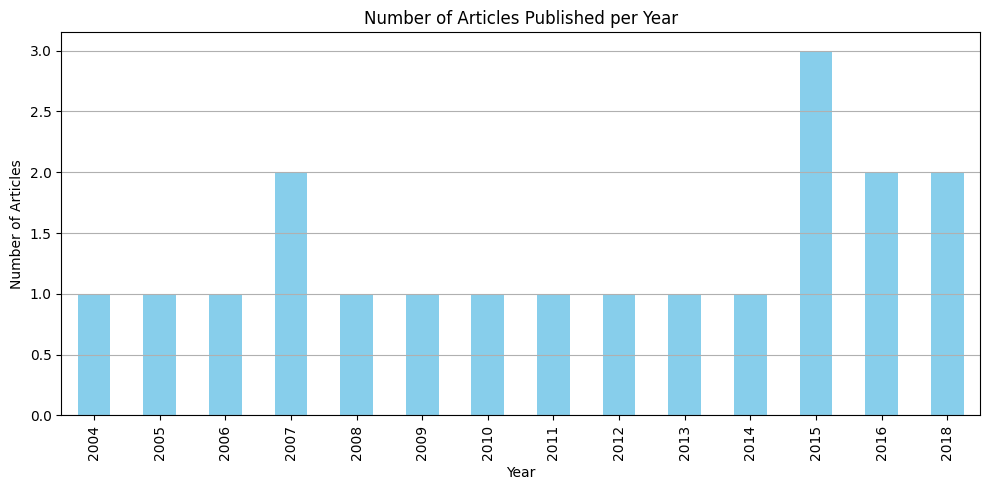

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
year_counts = df['Year'].value_counts().sort_index()

# Plot
year_counts.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Number of Articles Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


2. Publications by Publisher

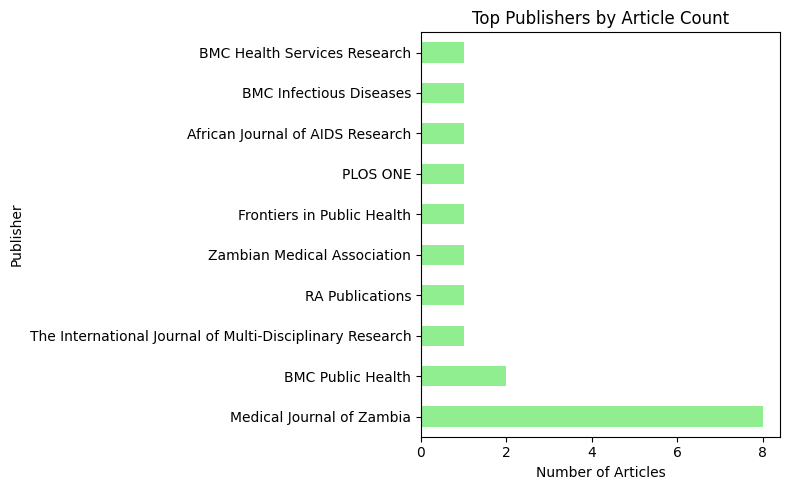

In [ ]:
df['Publisher'].value_counts().head(10).plot(kind='barh', color='lightgreen', figsize=(8,5))
plt.title('Top Publishers by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()


In [ ]:
df[['Publisher','Author','Title']].head(20)

,Publisher,Author,Title
0,The International Journal of Multi-Disciplinar...,Munsaka Soddy Mweetwa; Ndhlovu Jacob,Vitamin B12 and Folate deficiency in Megalobla...
1,Zambian Medical Association,Prashar Lavina; Goma Fastone; Kalungia Chichon...,Indigenous Knowledge Systems for the Treatment...
2,RA Publications,Prashar Lavina; Muyenga Tumelo; Bwalya Angela ...,The Effect of Kigelia africana Fruit Extract o...
3,Medical Journal of Zambia,Banda S. S.,Determining how the knowledge of anatomy may I...
4,Medical Journal of Zambia,Vwalika B.; Ahmed Y.; Kasela J.,Feto-Maternal Outcomes of Term Assisted Breech...
5,Frontiers in Public Health,Muyunda B.; Musonda P.; Mee P.; Todd J.; Miche...,Educational Attainment as a Predictor of HIV T...
6,Medical Journal of Zambia,Sijumbila G.; Munkombwe D.; Mweemba C.; Kasong...,Prevalence and Clinical Presentation of Pre-Ec...
7,PLOS ONE,Michelo C.; Sandøy I. F.; Fylkesnes K.,Marked HIV Prevalence Decline in Higher Educat...
8,BMC Public Health,Chomba E.; Haworth A.; Atashili J.; Kasonde P....,"Knowledge, Attitudes, and Practices Towards HI..."
9,Medical Journal of Zambia,Mwape H.; Lubeya M. K.; Vwalika B.,Prevalence and Factors Associated with Caesare...


##DATE PREPARATION


1. Create Binary Feature: Is_UNZA_Author (Feature Engineering)
    
    * Create a binary target variable called Is_UNZA_Author that will be 1 if unza staff, else 0

In [ ]:
# Step 1: Extract individual author names
df['Author_List'] = df['Author'].str.split(';')

# Step 2: Flatten and clean the names
from itertools import chain

all_authors = list(chain.from_iterable(df['Author_List']))
cleaned_authors = [a.strip() for a in all_authors]
unique_authors = sorted(set(cleaned_authors))

# Print the list of unique authors (manually inspect to flag UNZA staff)
print(unique_authors)


['Ahmed Y.', 'Atashili J.', 'Ayles H.', 'Balabanova D.', 'Banda J.', 'Banda S. S.', 'Besa E.', 'Bwalya Angela Gono', 'Chanda-Kapata P.', 'Chansa C.', 'Chileshe M.', 'Chintu N.', 'Chirwa B. C.', 'Chomba E.', 'Fylkesnes K.', 'Goma Fastone', 'Hamachila Audrey', 'Haworth A.', 'Hurtig A. K.', 'Kalungia Chichony Aubrey', 'Kasela J.', 'Kasonde J. M.', 'Kasonde P.', 'Kasongo J.', 'Kinsman J.', 'Lubeya M. K.', 'Mee P.', 'Michelo C.', 'Mulenga D.', 'Munkombwe D.', 'Munsaka Soddy Mweetwa', 'Musoke Pamela', 'Musonda P.', 'Mutale W.', 'Mutati Ronald Kampamba', 'Muula A. S.', 'Muungo L.T.M', 'Muyenga Tumelo', 'Muyunda B.', 'Mwale C.', 'Mwanamwenge M. T.', 'Mwape C.', 'Mwape H.', 'Mweemba C.', 'Mwila Chiluba', 'Ndhlovu Jacob', 'Njobvu C.', 'Phiri M.', 'Prashar Lavina', 'Rudatsikira E.', 'Sandøy I. F.', 'Sichone J. J.', 'Sijumbila G.', 'Simukanga S.', 'Sitali M.', 'Siziya S.', 'Tembo F.', 'Todd J.', 'Vwalika B.', 'Zingani Ellah', 'Zulu J. M.']


In [ ]:
unza_authors = {
    'Munsaka Soddy Mweetwa', 'Ndhlovu Jacob', 'Prashar Lavina', 'Goma Fastone',
    'Kalungia Chichoni', 'Muyenga Tumelo', 'Bwalya Angela', 'Banda S. S.',
    'Vwalika B.', 'Ahmed Y.', 'Kasela J.', 'Muyunda B.', 'Musonda P.', 'Michelo C.',
    'Kasongo J.', 'Mwape H.', 'Lubeya M. K.', 'Sijumbila G.', 'Munkombwe D.',
    'Mweemba C.', 'Kasonde P.', 'Sichone J. J.', 'Kasonde J. M.', 'Chirwa B. C.',
    'Mwale C.', 'Simukanga S.', 'Sitali M.', 'Tembo F.', 'Mulenga D.',
    'Mutale W.', 'Mwanamwenge M. T.', 'Zulu J. M.', 'Phiri M.', 'Banda J.',
    'Siziya S.', 'Chansa C.', 'Njobvu C.', 'Chomba E.'
}


In [ ]:
def is_unza_paper(author_list, unza_list):
    total = len(author_list)
    if total == 0:
        return 0
    count_unza = sum(1 for a in author_list if a.strip() in unza_list)
    return int((count_unza / total) >= 0.75)

# Apply function
df['Is_UNZA_Author'] = df['Author_List'].apply(lambda x: is_unza_paper(x, unza_authors))
